In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

print  ("Nguyễn Viết Ái Nhi - 6351071054")
data = pd.read_csv('/content/winequality-red.csv')
X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("Số lượng dữ liệu huấn luyện:", X_train.shape[0])
print("Số lượng dữ liệu kiểm thử:", X_test.shape[0])

data = data.dropna()

# Kiểm tra thông tin dữ liệu sau tiền xử lý
print("Số lượng dòng dữ liệu sau khi xóa trống:", len(data))
data.info()

Nguyễn Viết Ái Nhi - 6351071054
Số lượng dữ liệu huấn luyện: 1119
Số lượng dữ liệu kiểm thử: 480
Số lượng dòng dữ liệu sau khi xóa trống: 1599
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory

**Câu 3**

Nguyễn Viết Ái Nhi - 6351071054


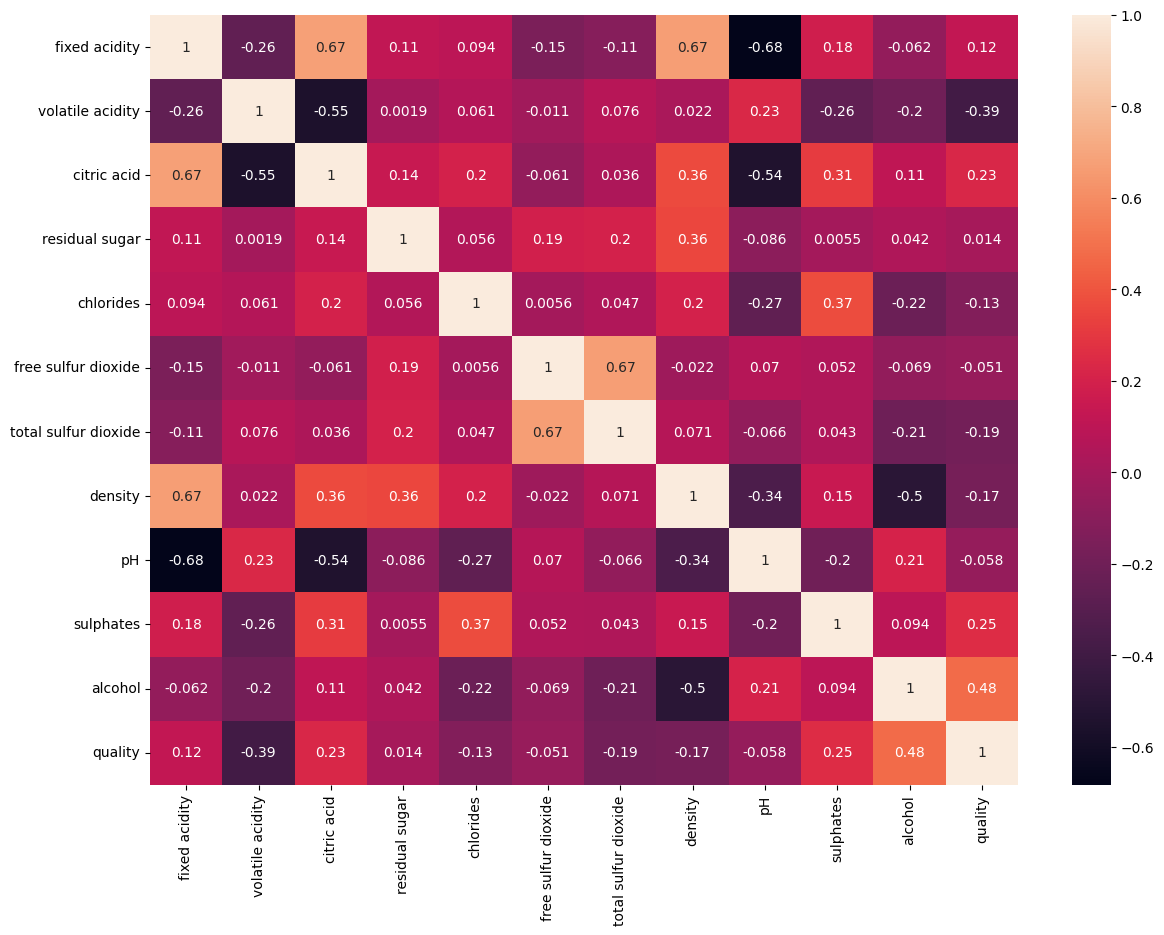

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Nguyễn Viết Ái Nhi - 6351071054")

from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

plt.figure(figsize=(14,10))
sns.heatmap(data_encoded.corr(), annot=True)
plt.show()

**Câu 4**

In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")
features = data.drop('quality', axis=1)
labels = data['quality']

# --- Hiển thị thông tin sau khi tách ---
print("\n Kích thước features:", features.shape)
print(" Kích thước labels:", labels.shape)

print("\n Các cột trong FEATURES:")
print(features.columns.tolist())

print("\n Một vài dòng đầu của FEATURES:")
print(features.head())

print("\n Một vài dòng đầu của LABELS:")
print(labels.head())

Nguyễn Viết Ái Nhi - 6351071054

 Kích thước features: (1599, 11)
 Kích thước labels: (1599,)

 Các cột trong FEATURES:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

 Một vài dòng đầu của FEATURES:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.2

**Câu 5**

In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")

# Lấy các cột categorical
categorical_cols = features.select_dtypes(exclude=['int64']).columns

# Hiển thị các cột này
print(categorical_cols)

Nguyễn Viết Ái Nhi - 6351071054
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:
print("Nguyễn Viết Ái Nhi - 6351071054")
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

Nguyễn Viết Ái Nhi - 6351071054


,fixed acidity_4.6,fixed acidity_4.7,fixed acidity_4.9,fixed acidity_5.0,fixed acidity_5.1,fixed acidity_5.2,fixed acidity_5.3,fixed acidity_5.4,fixed acidity_5.5,fixed acidity_5.6,...,alcohol_13.0,alcohol_13.1,alcohol_13.2,alcohol_13.3,alcohol_13.4,alcohol_13.5,alcohol_13.566666666666698,alcohol_13.6,alcohol_14.0,alcohol_14.9
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Câu 6**

In [ ]:
from sklearn.model_selection import train_test_split


print("Nguyễn Viết Ái Nhi - 6351071054")

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=0.30,
    random_state=0
)

print(X_train.shape, X_test.shape)


Nguyễn Viết Ái Nhi - 6351071054
(1119, 11) (480, 11)


**Câu 7**

In [ ]:
from sklearn import tree

# Khởi tạo ID3
clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)

# Huấn luyện
clf_id3.fit(X_train, y_train)

print("Nguyễn Viết Ái Nhi - 6351071054")
print(clf_id3.get_params())

Nguyễn Viết Ái Nhi - 6351071054
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:
from sklearn import metrics

# Dự đoán trên tập test
tree_pred_id3 = clf_id3.predict(X_test)

# Accuracy và báo cáo phân loại
tree_score_id3 = metrics.accuracy_score(y_test, tree_pred_id3)
print("Nguyễn Viết Ái Nhi - 6351071054")
print("ID3 Accuracy:", tree_score_id3)
print("ID3 Report:\n", metrics.classification_report(y_test, tree_pred_id3))


Nguyễn Viết Ái Nhi - 6351071054
ID3 Accuracy: 0.6041666666666666
ID3 Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.20      0.20      0.20        15
           5       0.68      0.72      0.70       208
           6       0.64      0.56      0.60       204
           7       0.41      0.53      0.46        45
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.32      0.33      0.33       480
weighted avg       0.61      0.60      0.61       480



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Nguyễn Viết Ái Nhi - 6351071054


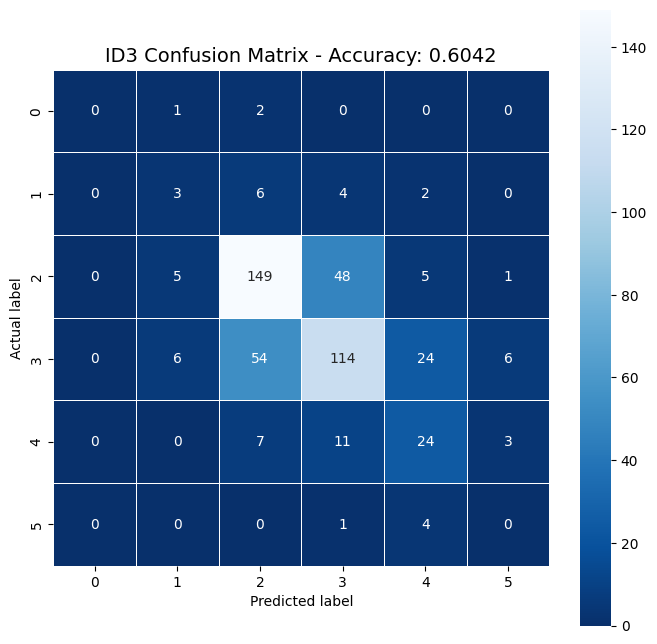

In [ ]:
import matplotlib.pyplot as plt

# Ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred_id3)

print("Nguyễn Viết Ái Nhi - 6351071054")
plt.figure(figsize=(8,8))
sns.heatmap(tree_cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'ID3 Confusion Matrix - Accuracy: {tree_score_id3:.4f}', size=14)
plt.show()


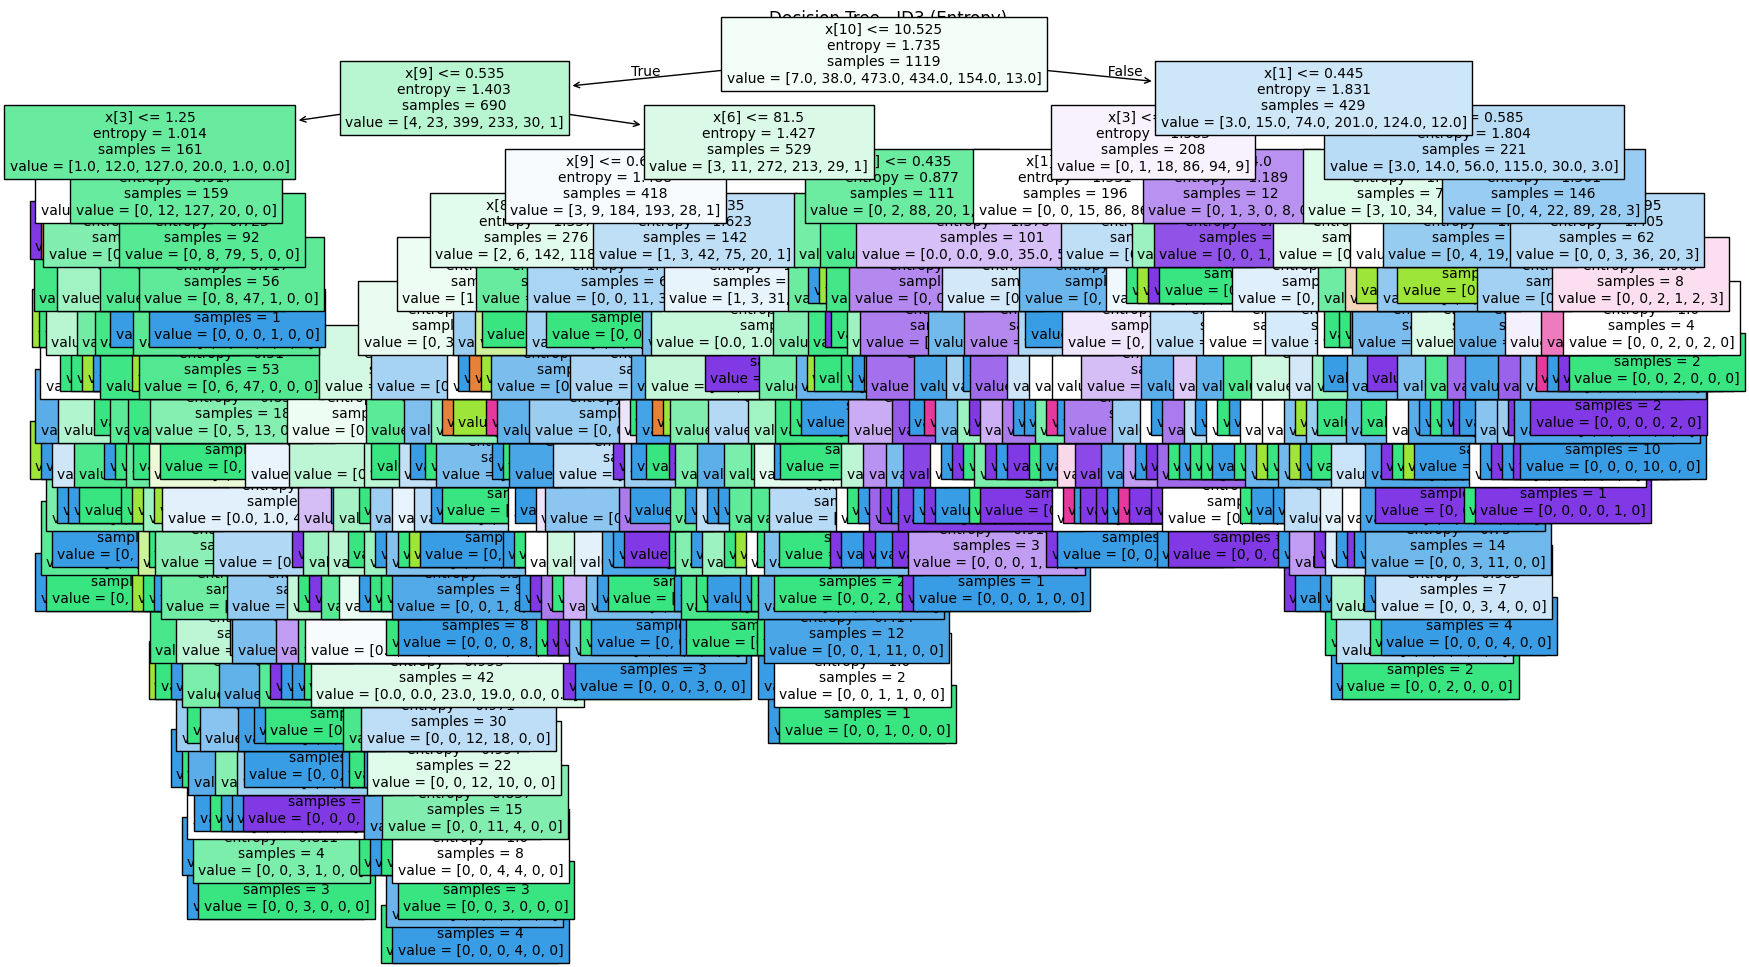

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
tree.plot_tree(clf_id3, filled=True, fontsize=10)
plt.title("Decision Tree - ID3 (Entropy)")
plt.show()
print("Nguyễn Viết Ái Nhi - 6351071054")


**Câu 8**

In [ ]:

# Khởi tạo CART
clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

# Huấn luyện
clf_cart.fit(X_train, y_train)

print("Nguyễn Viết Ái Nhi - 6351071054")
print("CART Params:", clf_cart.get_params())


Nguyễn Viết Ái Nhi - 6351071054
CART Params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:
from sklearn import metrics

# Dự đoán trên tập test
tree_pred_cart = clf_cart.predict(X_test)

# Accuracy và báo cáo phân loại
tree_score_cart = metrics.accuracy_score(y_test, tree_pred_cart)
print("Nguyễn Viết Ái Nhi - 6351071054")
print("CART Accuracy:", tree_score_cart)
print("CART Report:\n", metrics.classification_report(y_test, tree_pred_cart))


Nguyễn Viết Ái Nhi - 6351071054
CART Accuracy: 0.5770833333333333
CART Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.11      0.07      0.08        15
           5       0.68      0.69      0.68       208
           6       0.62      0.55      0.58       204
           7       0.30      0.47      0.37        45
           8       0.00      0.00      0.00         5

    accuracy                           0.58       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.59      0.58      0.58       480



Nguyễn Viết Ái Nhi - 6351071054


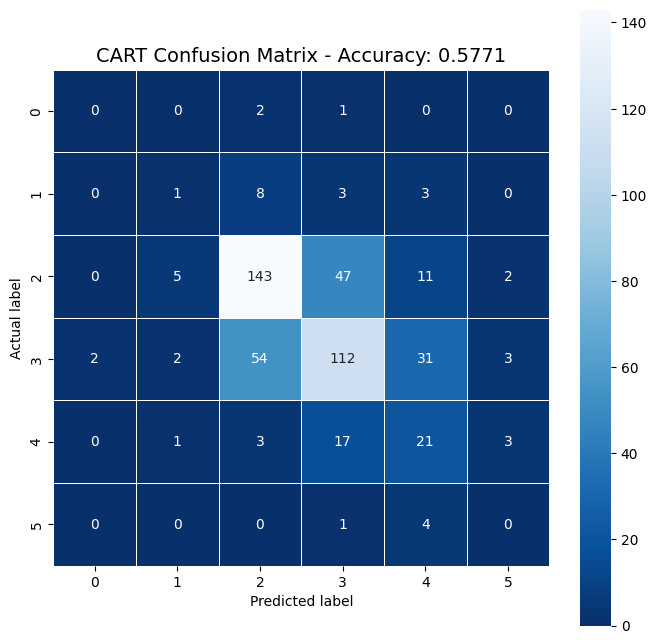

In [ ]:

# Ma trận nhầm lẫn
tree_cm_cart = metrics.confusion_matrix(y_test, tree_pred_cart)

print("Nguyễn Viết Ái Nhi - 6351071054")
plt.figure(figsize=(8,8))
sns.heatmap(tree_cm_cart, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'CART Confusion Matrix - Accuracy: {tree_score_cart:.4f}', size=14)
plt.show()


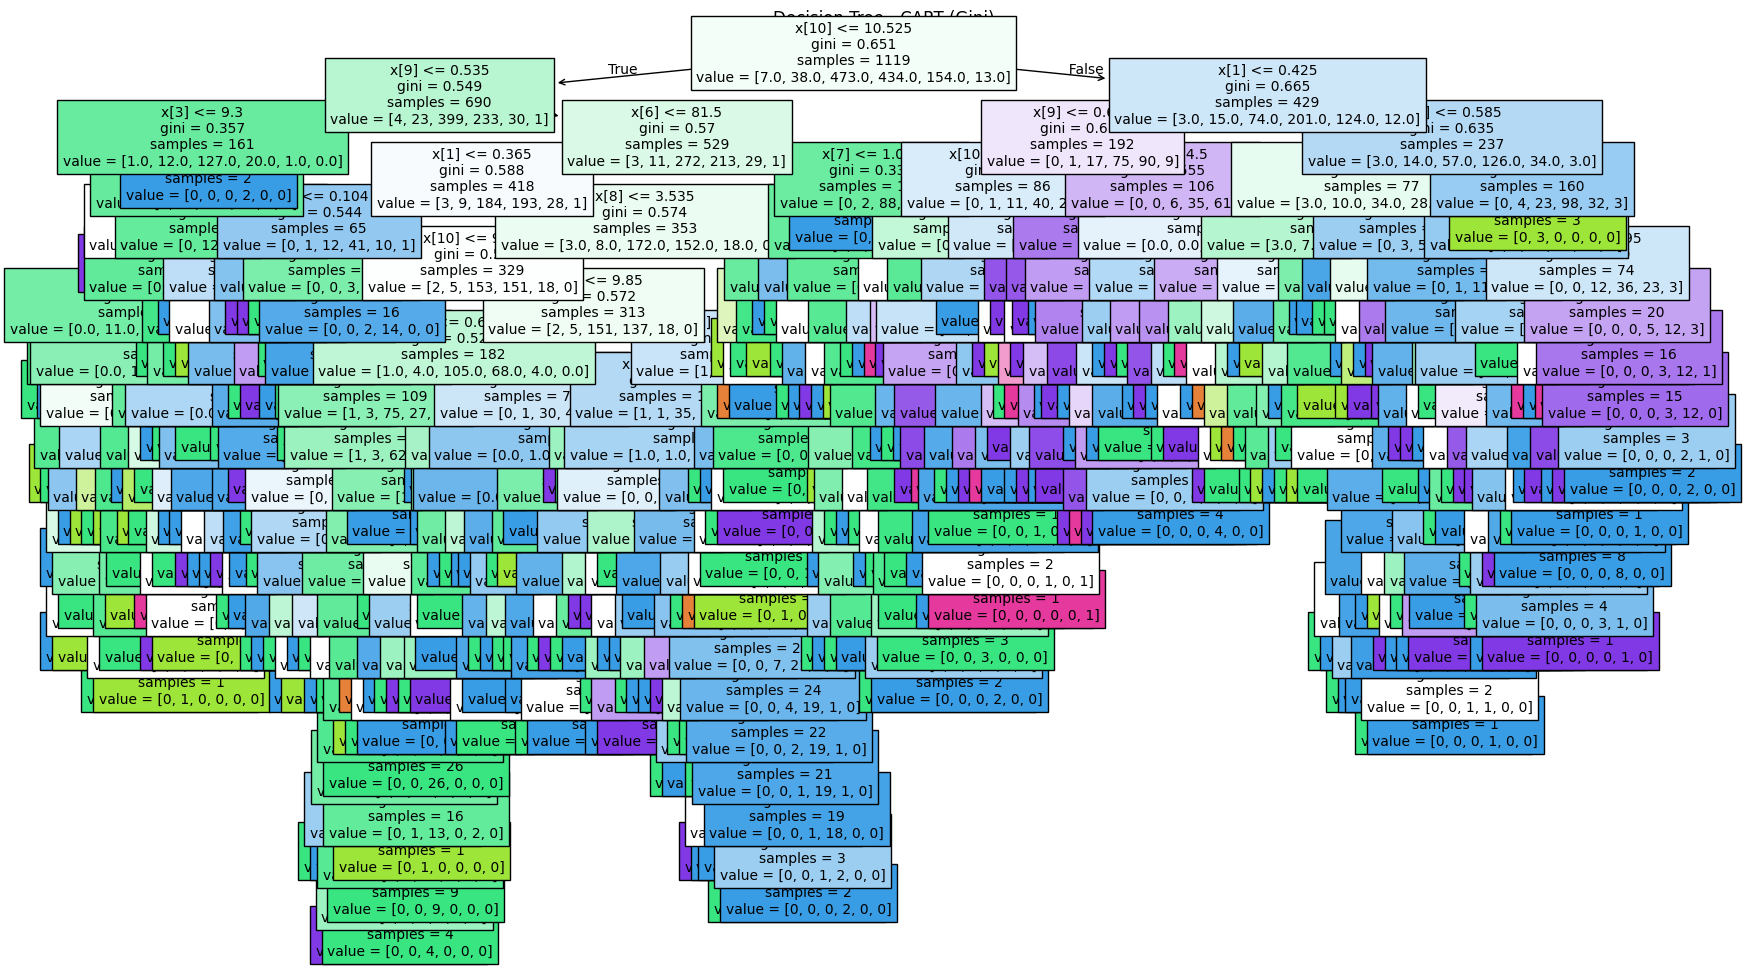

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
tree.plot_tree(clf_cart, filled=True, fontsize=10)
plt.title("Decision Tree - CART (Gini)")
plt.show()
print("Nguyễn Viết Ái Nhi - 6351071054")


**Câu 9**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Khởi tạo Gaussian Naive Bayes
gnb = GaussianNB()

# Huấn luyện và dự đoán
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Nguyễn Viết Ái Nhi - 6351071054")

Nguyễn Viết Ái Nhi - 6351071054


In [ ]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))
print("Nguyễn Viết Ái Nhi - 6351071054")

Accuracy: 0.5479166666666667
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.69      0.66      0.68       208
           6       0.58      0.49      0.53       204
           7       0.30      0.58      0.40        45
           8       0.00      0.00      0.00         5

    accuracy                           0.55       480
   macro avg       0.26      0.29      0.27       480
weighted avg       0.58      0.55      0.56       480

Nguyễn Viết Ái Nhi - 6351071054


Nguyễn Viết Ái Nhi - 6351071054


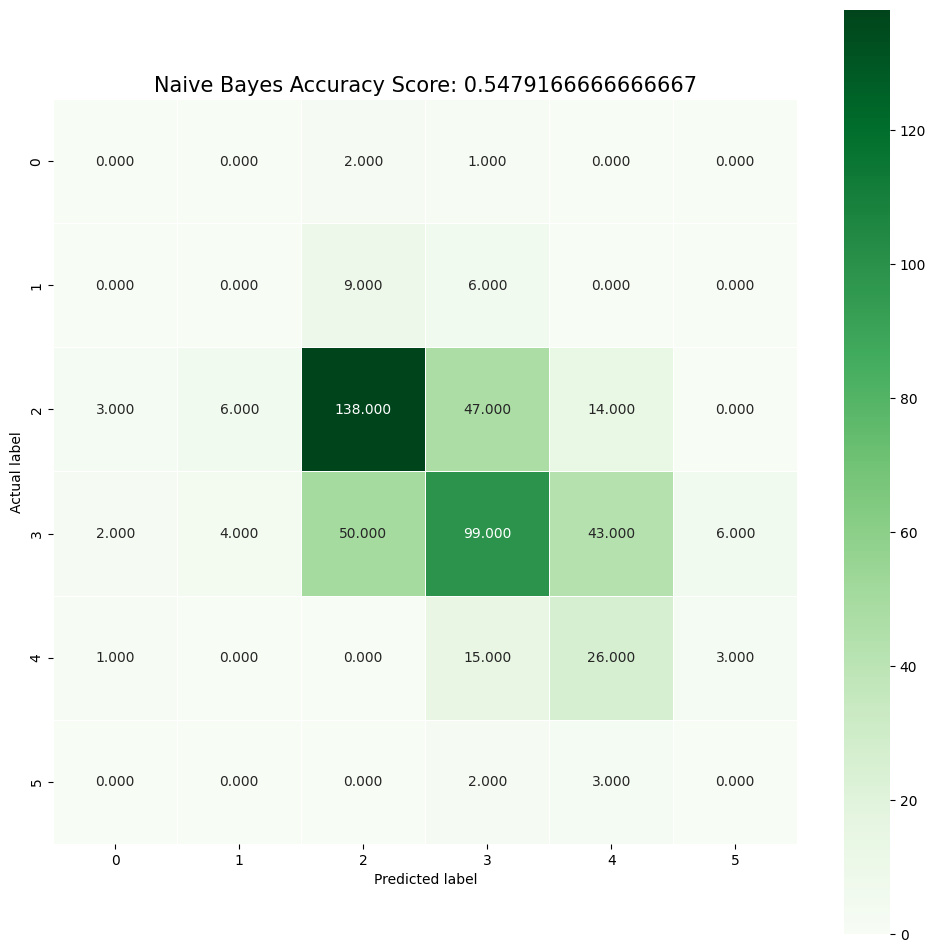

In [ ]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15);
print("Nguyễn Viết Ái Nhi - 6351071054")

**Câu 10**

**ID3**
| Lớp | True Positive (Dự đoán đúng) | Lỗi lớn nhất (Phân loại nhầm)                  |
|-----|------------------------------|-----------------------------------------------|
| 0   | 0                            | Nhầm thành Lớp 2 (2) và Lớp 1 (1)           |
| 1   | 3                            | Nhầm thành Lớp 2 (6) và Lớp 3 (4)           |
| 2   | 149                          | Nhầm thành Lớp 3 (48)                        |
| 3   | 114                          | Nhầm thành Lớp 2 (54) và Lớp 4 (24)         |
| 4   | 24                           | Nhầm thành Lớp 2 (7) và Lớp 3 (11)          |
| 5   | 4                            | Nhầm thành Lớp 3 (2) và Lớp 4 (3)           |

**Nhận xét:** Mô hình ID3 có độ chính xác cao nhất (60.42%). Nó hoạt động hiệu quả nhất ở việc phân loại các Lớp 2 (149) và Lớp 3 (114), nhưng thường xuyên nhầm lẫn hai lớp này với nhau.

**CART**
| Lớp | True Positive (Dự đoán đúng) | Lỗi lớn nhất (Phân loại nhầm)                  |
|-----|------------------------------|-----------------------------------------------|
| 0   | 0                            | Nhầm thành Lớp 2 (2) và Lớp 3 (1)           |
| 1   | 1                            | Nhầm thành Lớp 2 (8) và Lớp 4 (3)           |
| 2   | 143                          | Nhầm thành Lớp 3 (47)                        |
| 3   | 112                          | Nhầm thành Lớp 2 (54) và Lớp 4 (31)         |
| 4   | 21                           | Nhầm thành Lớp 3 (17)                        |
| 5   | 0                            | Nhầm thành Lớp 4 (4) và Lớp 3 (2)           |

**Nhận xét:** Mô hình CART có độ chính xác thấp hơn ID3. Tương tự, nó chủ yếu hoạt động tốt với Lớp 2 và Lớp 3 nhưng thường nhầm lẫn giữa chúng.

**Navie Bayes**

| Lớp | True Positive (Dự đoán đúng) | Lỗi lớn nhất (Phân loại nhầm)                  |
|-----|------------------------------|-----------------------------------------------|
| 0   | 0                            | Nhầm thành Lớp 2 (2) và Lớp 3 (1)           |
| 1   | 0                            | Nhầm thành Lớp 3 (6) và Lớp 2 (9)           |
| 2   | 138                          | Nhầm thành Lớp 3 (47)                        |
| 3   | 99                           | Nhầm thành Lớp 4 (43) và Lớp 2 (50)         |
| 4   | 26                           | Nhầm thành Lớp 3 (15)                        |
| 5   | 0                            | Nhầm thành Lớp 4 (3) và Lớp 3 (2)           |

**Nhận xét:** Mô hình Naive Bayes có độ chính xác thấp nhất (54.79%). Nó phân loại kém hơn đáng kể đối với Lớp 3 (chỉ 99 dự đoán đúng, so với 114 của ID3) và có nhiều lỗi nhầm lẫn hơn (50 lỗi nhầm Lớp 3 thành Lớp 2).